## Introduction
- **Purpose**: The purpose of the project is to analyze UFood's campaign results and find business insights and oppurtunities to optimize their campaign results and generate value for the company. To uncover and achieve these goals the project will identify trends in ages of customers, what purchase method brought in the most revenue (catalog, in-store, and web), if having children affects purchases, level of education, and marital stauts. By delving into these areas, this project aims to increase the underwelming profit growth perspectives over the next three years.
- **Dataset Overview**
  - This project uses the primary dataset:
    - u_food_marketing.csv: This datasets contains individual order records, including yearly income, amount purchased of each product, recency of purchase, and additional personal information. It provides the foundation for analyzing sales trends, customer retention, and factors affecting customers purchasing history.
---

## Data Loading
Load and examine the intial structure of the dataset required for this analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\data\u_food_marketing.csv")
pd.set_option('display.max.columns',45)
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,1,0,0,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,1,0,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,1,0,0,0,0,0,1,36,23,1


---

## Data Cleaning  
Data cleaning is essential to prepare the datasets for analysis. This section focuses on ensuring consistency, handling missing values, and standardizing formats across the data.  

In [10]:
df_staged = df

In [11]:
df_staged[df_staged.duplicated()].sum()

Income                  9366769.0
Kidhome                      79.0
Teenhome                     87.0
Recency                    9277.0
MntWines                  55672.0
MntFruits                  4936.0
MntMeatProducts           28906.0
MntFishProducts            7256.0
MntSweetProducts           4708.0
MntGoldProds               8380.0
NumDealsPurchases           403.0
NumWebPurchases             725.0
NumCatalogPurchases         488.0
NumStorePurchases          1104.0
NumWebVisitsMonth           975.0
AcceptedCmp3                 12.0
AcceptedCmp4                  9.0
AcceptedCmp5                 15.0
AcceptedCmp1                  9.0
AcceptedCmp2                  4.0
Complain                      1.0
Z_CostContact               552.0
Z_Revenue                  2024.0
Response                     22.0
Age                        9358.0
Customer_Days            464574.0
marital_Divorced             16.0
marital_Married              69.0
marital_Single               34.0
marital_Togeth

In [12]:
df_staged.drop_duplicates(keep= False, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [14]:
df_staged['Total Children'] = df_staged[['Kidhome', 'Teenhome']].sum(axis=1)

In [15]:
df_staged.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [16]:
df_staged['marital_Divorced'] = df_staged['marital_Divorced'].replace({1:5,0:0})
df_staged['marital_Married'] = df_staged['marital_Married'].replace({1:4,0:0})
df_staged['marital_Single'] = df_staged['marital_Single'].replace({1:3,0:0})
df_staged['marital_Together'] = df_staged['marital_Together'].replace({1:2,0:0})
df_staged['marital_Widow'] = df_staged['marital_Widow'].replace({1:1,0:0})

In [17]:
df_staged.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,2,0,0,0,0,1,0,702,688,0,1
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,5,0,0,0,0,0,0,1,0,0,563,536,0,1
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,4,0,0,0,0,0,0,0,1,146,123,0,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,1,44,42,0,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,1,36,23,1,2


In [18]:
df_staged['Marital_Status'] = df_staged[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].sum(axis=1)

In [19]:
df_staged['Marital_Status'] = df_staged['Marital_Status'].map({5:'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [21]:
df_staged.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total Children,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,Married


In [30]:
df_staged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [35]:
df_staged['education_PhD'] = df_staged['education_PhD'].replace({1:5,0:0})
df_staged['education_Master'] = df_staged['education_Master'].replace({1:4,0:0})
df_staged['education_Graduation'] = df_staged['education_Graduation'].replace({1:3,0:0})
df_staged['education_Basic'] = df_staged['education_Basic'].replace({1:2,0:0})
df_staged['education_2n Cycle'] = df_staged['education_2n Cycle'].replace({1:1,0:0})

In [38]:
df_staged['Accepted_Campaigns'] = df_staged[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
df_staged['Accepted_Campaigns'] = (df_staged['Accepted_Campaigns'] != 0).astype(int)

In [40]:
df_staged['Education_Status'] = df_staged[['education_PhD', 'education_Master', 'education_Graduation', 'education_Basic', 'education_2n Cycle']].sum(axis=1)

---
## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) provides an initial understanding of the data’s underlying patterns, distributions, and potential relationships between key variables.

- Objective: Analyze and visualize basic trends in the data to uncover patterns in purchases, statuses, and customer behavior across different dimensions.

In [43]:
df_encoded = pd.get_dummies(df_staged, drop_first=True)
corr = df_encoded.corr(numeric_only=True)['Accepted_Campaigns']
corr.sort_values(ascending=False)

Accepted_Campaigns         1.000000
AcceptedCmpOverall         0.713352
Response                   0.685109
AcceptedCmp4               0.465985
AcceptedCmp3               0.453742
AcceptedCmp5               0.441264
AcceptedCmp1               0.426687
MntWines                   0.416651
MntTotal                   0.393910
MntRegularProds            0.391931
NumCatalogPurchases        0.322143
MntMeatProducts            0.298240
Income                     0.292812
NumWebPurchases            0.221217
MntGoldProds               0.188209
AcceptedCmp2               0.174619
MntSweetProducts           0.156430
MntFruits                  0.149973
MntFishProducts            0.145404
NumStorePurchases          0.144965
Customer_Days              0.083874
Education_Status           0.062534
marital_Single             0.051947
Marital_Status_Single      0.051947
education_PhD              0.043488
marital_Widow              0.038379
Marital_Status_Widow       0.038379
Age                        0

<Axes: >

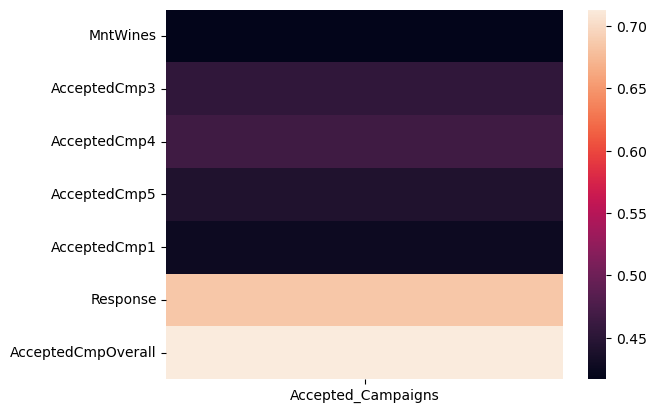

In [45]:
all_correlations = corr[(corr > 0.4) & (corr < 1)].to_frame()
sns.heatmap(all_correlations)

In [46]:
all_correlations['Accepted_Campaigns']

MntWines              0.416651
AcceptedCmp3          0.453742
AcceptedCmp4          0.465985
AcceptedCmp5          0.441264
AcceptedCmp1          0.426687
Response              0.685109
AcceptedCmpOverall    0.713352
Name: Accepted_Campaigns, dtype: float64

In [49]:
age_groups = [(23,30), (31,40), (41,50), (51,60), (61,70), (71,85)]

In [51]:
def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

df_staged['Age Group'] = df_staged['Age'].apply(assign_age_group)

df_staged[['Age', 'Age Group']].head()

,Age,Age Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='Age Group', ylabel='Accepted_Campaigns'>

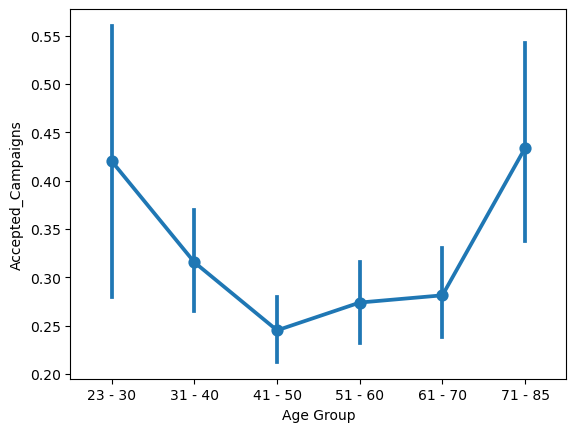

In [53]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']
sns.pointplot(data = df_staged, x = 'Age Group', y = 'Accepted_Campaigns', order = age_order)

In [55]:
counts = df_staged['Age Group'].value_counts()

In [57]:
percentage = (counts / df_staged.shape[0]) * 100

In [59]:
percentage_df = percentage.reset_index()

In [61]:
percentage_df.columns = ['Age Group', 'percentage']

In [63]:
percentage_df = percentage_df.sort_values('Age Group')

<Axes: xlabel='Age Group', ylabel='percentage'>

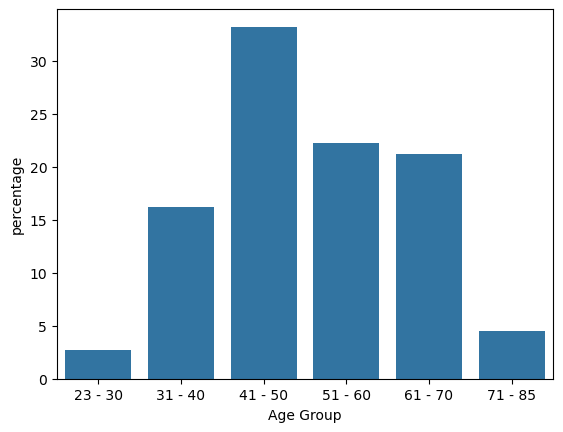

In [65]:
sns.barplot(x = 'Age Group', y = 'percentage', data = percentage_df)

### Core Audience for accepting campaigns right now is 31 - 70 years old.

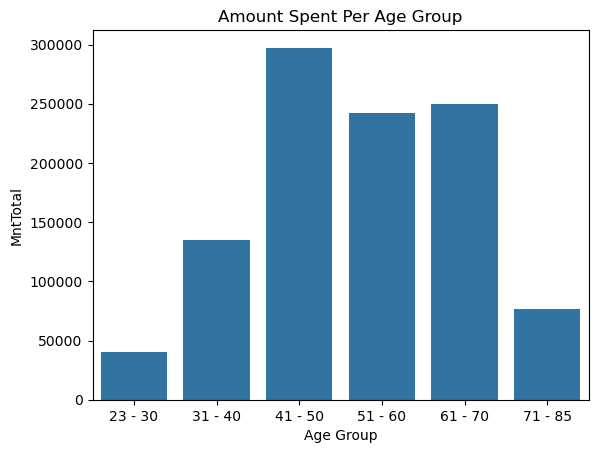

In [68]:
df_grouped = df_staged.groupby('Age Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age Group', y = 'MntTotal', data = df_grouped)
plt.title('Amount Spent Per Age Group')
plt.show()

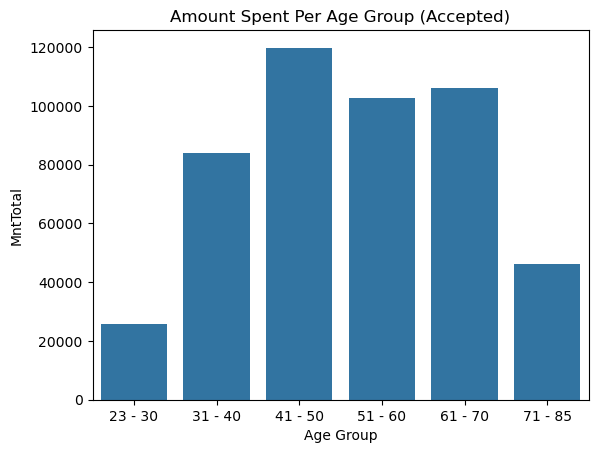

In [70]:
accepted_campaigns = df_staged[df_staged['Accepted_Campaigns'] != 0]

df_grouped = accepted_campaigns.groupby('Age Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age Group', y = 'MntTotal', data = df_grouped)
plt.title('Amount Spent Per Age Group (Accepted)')
plt.show()

In [72]:
df_staged.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total Children,Marital_Status,Accepted_Campaigns,Education_Status,Age Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,Single,1,3,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,Single,0,3,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,Together,0,3,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,Together,0,3,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,Married,0,5,31 - 40


In [74]:
sum_df = pd.DataFrame(df_staged[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sum'])
sum_df = sum_df.reset_index()

In [76]:
sum_df.rename(columns = {'index' : 'Type_of_Purchase'}, inplace = True)
sum_df.head()

,Type_of_Purchase,Sum
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

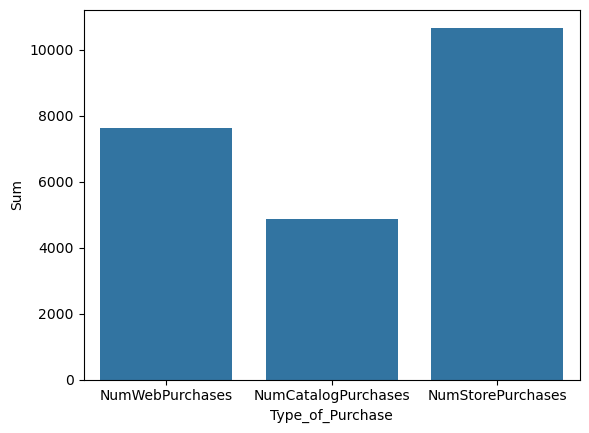

In [78]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_df)

<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

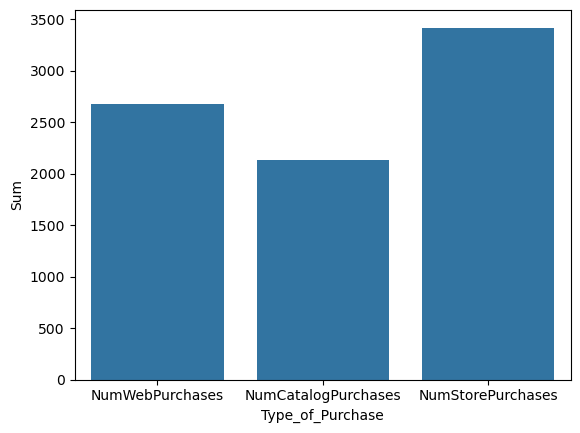

In [80]:
sum_df = pd.DataFrame(accepted_campaigns[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sum'])
sum_df = sum_df.reset_index()
sum_df.rename(columns = {'index' : 'Type_of_Purchase'}, inplace = True)
sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_df)

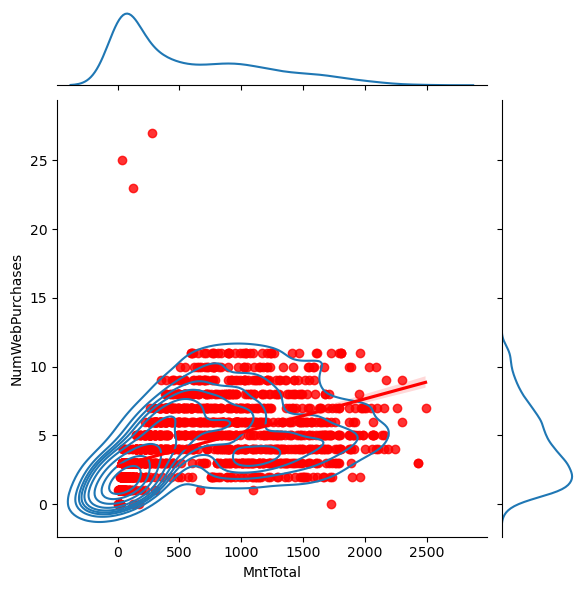

In [82]:
x = sns.jointplot(data = df_staged, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

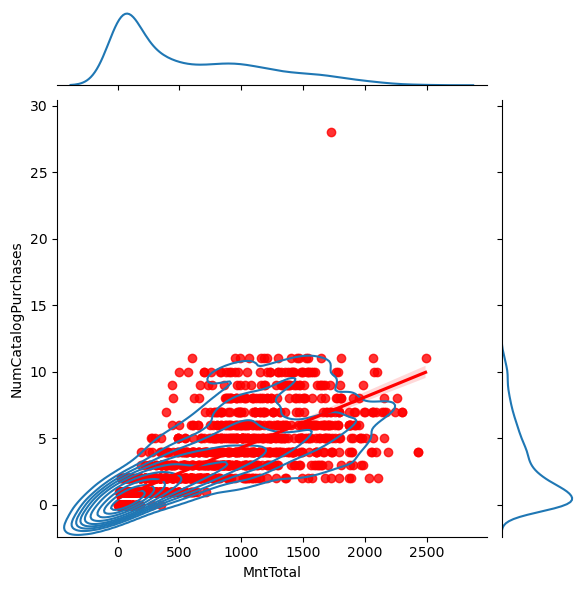

In [83]:
x = sns.jointplot(data = df_staged, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

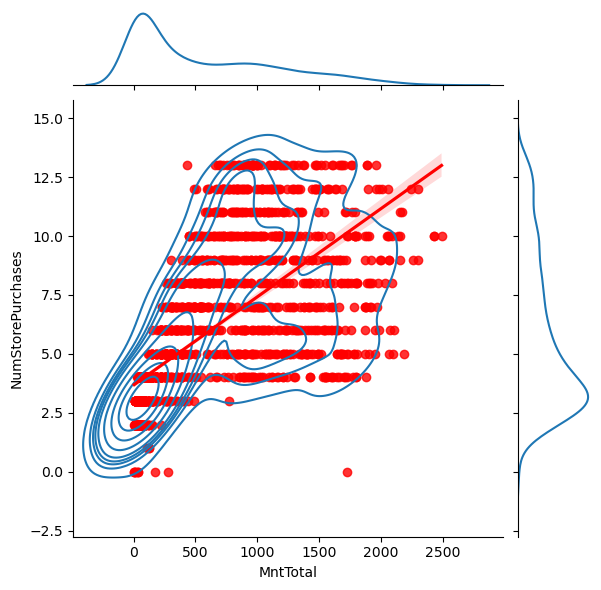

In [84]:
x = sns.jointplot(data = df_staged, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

<Axes: xlabel='Total Children', ylabel='MntTotal'>

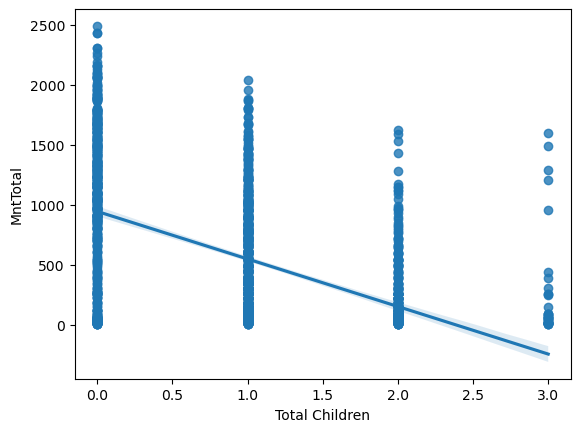

In [85]:
sns.regplot(x = 'Total Children', y = 'MntTotal', data = df_staged)

<Axes: xlabel='Total Children', ylabel='Accepted_Campaigns'>

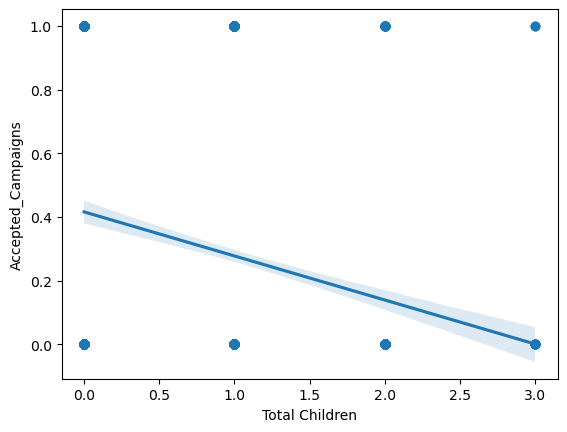

In [86]:
sns.regplot(x = 'Total Children', y = 'Accepted_Campaigns', data = df_staged)

### Those with more kids are accepting less campaigns and spending less money than those with kids. As a result, there needs to be significantly more focus on those with kids.
---

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

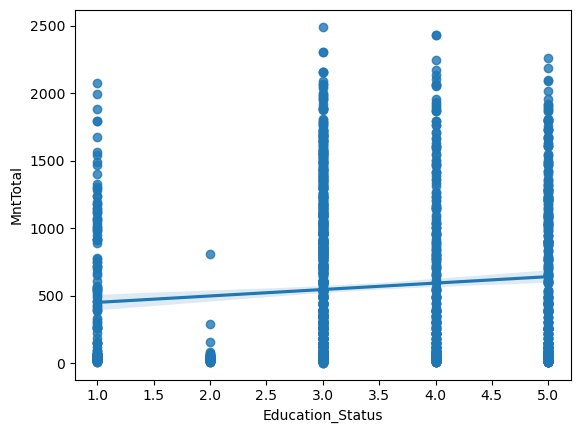

In [93]:
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = df_staged)

### Education isn't a significant factor in the amount spent.

<Axes: xlabel='Marital_Status', ylabel='count'>

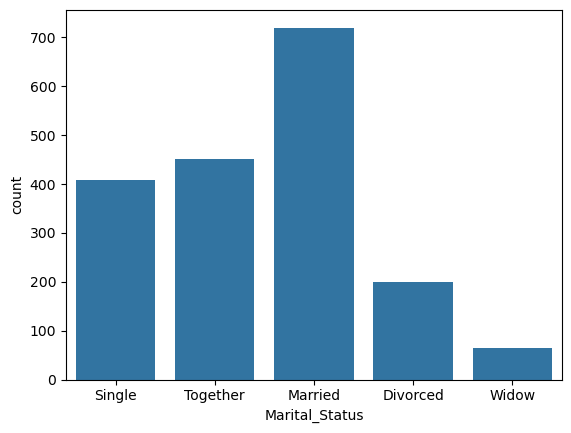

In [98]:
sns.countplot(x = 'Marital_Status', data = df_staged)

In [121]:
relationship = df_staged.groupby('Marital_Status')['MntTotal'].sum().reset_index()

In [123]:
relationship

,Marital_Status,MntTotal
0,Divorced,111813
1,Married,397442
2,Single,231616
3,Together,254606
4,Widow,46014


<Axes: xlabel='Marital_Status', ylabel='MntTotal'>

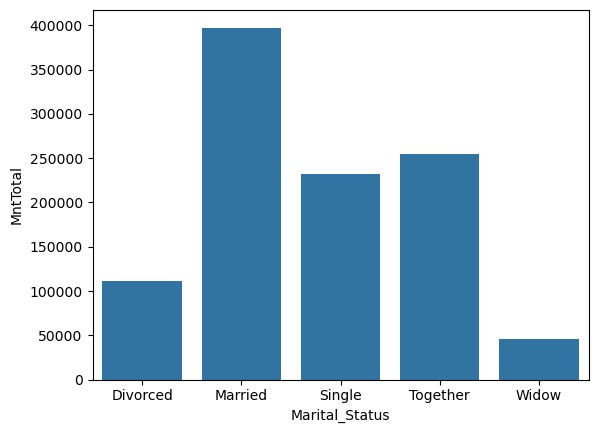

In [125]:
sns.barplot(x = 'Marital_Status', y = 'MntTotal', data = relationship)

In [127]:
accepted_campaign = df_staged[df_staged['Accepted_Campaigns'] != 0]
df_staged_accepted = accepted_campaign.groupby('Marital_Status')['MntTotal'].sum().reset_index()

<Axes: xlabel='Marital_Status', ylabel='MntTotal'>

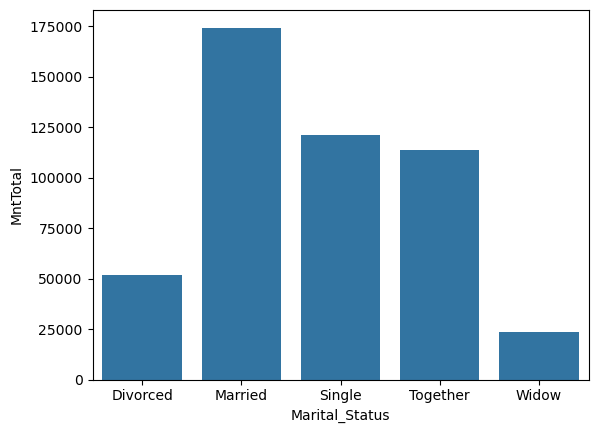

In [129]:
sns.barplot(x = 'Marital_Status', y = 'MntTotal', data = df_staged_accepted)

In [146]:
total = df_staged['Marital_Status'].value_counts()
accepted = df_staged[df_staged['Accepted_Campaigns'] == 1]['Marital_Status'].value_counts()
percentage_marital = accepted / total * 100

In [150]:
percent = percentage_marital.reset_index()
percent.columns = ['Marital_Status', 'Percentage']

<Axes: xlabel='Marital_Status', ylabel='Percentage'>

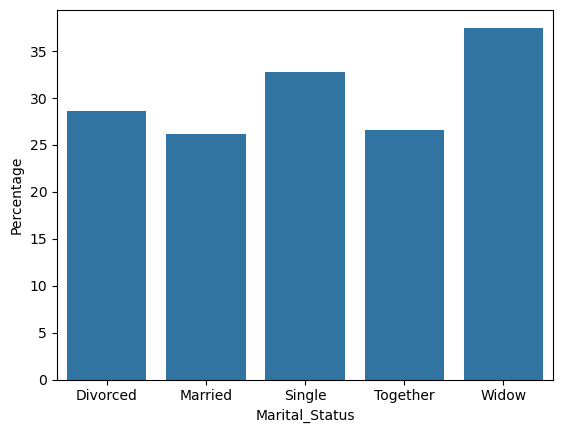

In [152]:
sns.barplot(x = 'Marital_Status', y = 'Percentage', data = percent)

### Those who are married, single, or together are spending significantly more money than those who are divorced or a widow. Therefore, we should put more focus on these three groups compared to the remaining population.
---

# Overall Findings:
1. Those between the age of 30 - 70 were spending more money, but not accepting campaigns as much as other age demopgraphics.
2. Those who bought from catalogs were more likely to accept a campaign, but in-person sales spent more on average than other sales methods. Recommend splitting between all three methods. Allocate 40% for catalogs and 30% for both in-person and web.
3. Focus on those with no kids or those with 1 possible two kids.
4. Education had no impact and can be ignored when making further decisions.
5. Marital Status doesn't play a big part in campaign acceptance percentage, but married, single, and together spend more money than other demographics.

# Target Groups:
1. Middle aged people, with high median incomes, and with no kids (possibly 1 or 2). Target this group through all methods using recommended percentages above.
2. 21 - 30, and 70+ as these are the ages who accepted the most amount of campaigns. May have to alter marketing strategies if sales don't increase as these groups already lack in sales compared to others. 